# Association Rule Mining for the Clean Makup Product Ingredients

In [72]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import networkx as nx

In [73]:
filename = "cleaned_dataset.csv"
df = pd.read_csv(filename)

print(df.columns)
print(df.dtypes)

Index(['is_clean', 'product_name', 'brand_name', 'size', 'loves_count',
       'number_of_reviews', 'rating', 'secondary_category',
       'tertiary_category', 'ingredients', 'ingredient_description',
       'limited_edition', 'online_only', 'sephora_exclusive', 'list_price'],
      dtype='object')
is_clean                    int64
product_name               object
brand_name                 object
size                      float64
loves_count                 int64
number_of_reviews           int64
rating                    float64
secondary_category         object
tertiary_category          object
ingredients                object
ingredient_description     object
limited_edition             int64
online_only                 int64
sephora_exclusive           int64
list_price                float64
dtype: object


In [74]:
# selecting only the clean products
df = df[df['is_clean'] == 1]

print(df)

      is_clean                                      product_name  \
0            1                       Hydrating Lip Treatment Oil   
1            1                 Skin-Enhancing Tinted Moisturizer   
2            1  Lash-Amplifying Volumizing & Lengthening Mascara   
3            1          Skin Melt Talc-Free Loose Setting Powder   
4            1                   Light-Catching Highlighter Balm   
...        ...                                               ...   
1173         1        Mini Petite Face Trace Cream Contour Stick   
1174         1                         Eye Pods Cream Eye Shadow   
1175         1                        Lip Suede Lipstick Palette   
1176         1                Beauty Butter Matte Powder Bronzer   
1177         1                   Bonne Brow Defining Brow Pencil   

           brand_name  size  loves_count  number_of_reviews  rating  \
0            Ami Colé  0.15        22871                397  4.3401   
1            Ami Colé  1.00         6596 

/var/folders/wf/94gp6c491j1frd1mbhkvm29c0000gn/T/ipykernel_8639/2789491363.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ingredients_df['ingredients'] = ingredients_df['ingredients'].apply(lambda x: truncate_ingredients(x, max_length=100))  # Increase max_length to 100


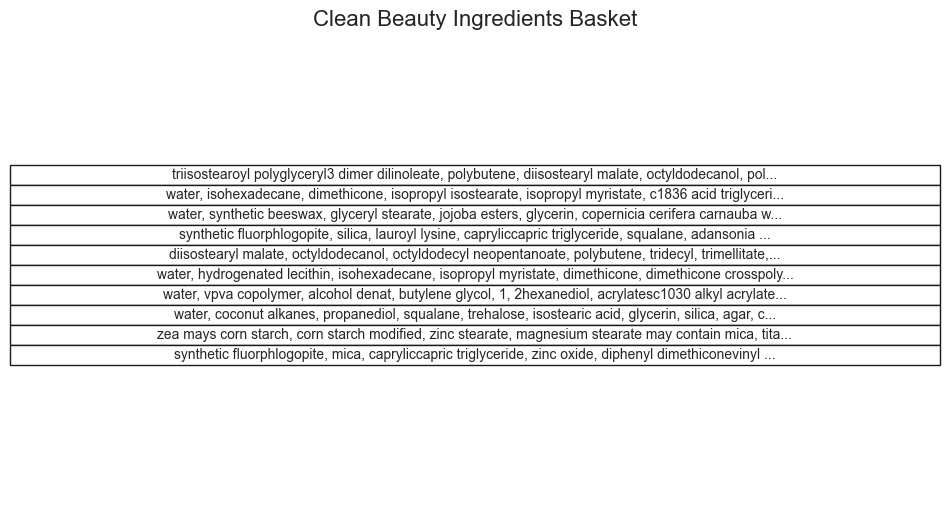

In [75]:
ingredients_df = df[[ 'ingredients']]

# truncate the ingredient list
def truncate_ingredients(ingredient_list, max_length=100):
    if len(ingredient_list) > max_length:
        return ingredient_list[:max_length] + '...'
    return ingredient_list

ingredients_df['ingredients'] = ingredients_df['ingredients'].apply(lambda x: truncate_ingredients(x, max_length=100))  # Increase max_length to 100

ingredients_df = ingredients_df.head(10)

fig, ax = plt.subplots(figsize=(10, 6))

ax.axis('tight')
ax.axis('off')
table_data = [ingredients_df.columns.tolist()] + ingredients_df.values.tolist()
table = ax.table(cellText=ingredients_df.values, colLabels=None, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10) 
table.scale(1.2, 1.2)  

plt.title('Clean Beauty Ingredients Basket', fontsize=16)
plt.savefig('clean_beauty_ingredients_basket.png', bbox_inches='tight', dpi=300)
plt.show()

In [91]:
df['ingredients'] = df['ingredients'].fillna('').str.split(',\s*')

# Create basket data
basket_data = df.explode('ingredients')

# python requires one-hot encoding
basket_df = pd.get_dummies(basket_data['ingredients'])
basket_df_grouped = basket_df.groupby(basket_data.index).sum()

#print(basket_df_grouped.head())

<>:1: DeprecationWarning: invalid escape sequence '\s'
<>:1: DeprecationWarning: invalid escape sequence '\s'
/var/folders/wf/94gp6c491j1frd1mbhkvm29c0000gn/T/ipykernel_8639/497961881.py:1: DeprecationWarning: invalid escape sequence '\s'
  df['ingredients'] = df['ingredients'].fillna('').str.split(',\s*')


/Users/xochitl/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/Users/xochitl/anaconda3/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


                       antecedents                     consequents  \
0                         ci 77499                        ci 77492   
1                         ci 77492                        ci 77499   
2             iron oxides ci 77491                        ci 77492   
3                         ci 77492            iron oxides ci 77491   
4                         ci 77499            iron oxides ci 77491   
5             iron oxides ci 77491                        ci 77499   
6                             mica            iron oxides ci 77491   
7             iron oxides ci 77491                            mica   
8                             mica                          silica   
9                           silica                            mica   
10  ci 77499, iron oxides ci 77491                        ci 77492   
11              ci 77499, ci 77492            iron oxides ci 77491   
12  iron oxides ci 77491, ci 77492                        ci 77499   
13                  

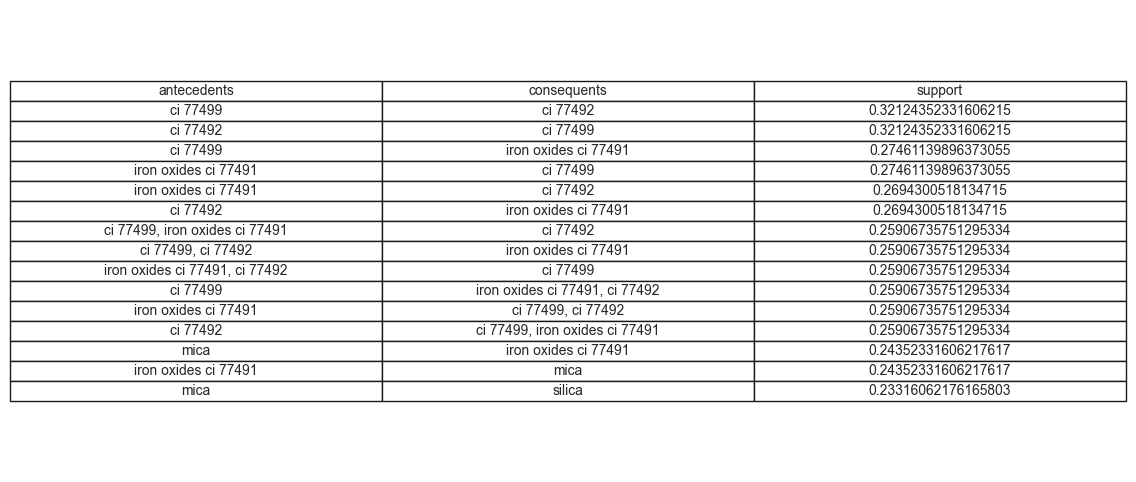

/Users/xochitl/anaconda3/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


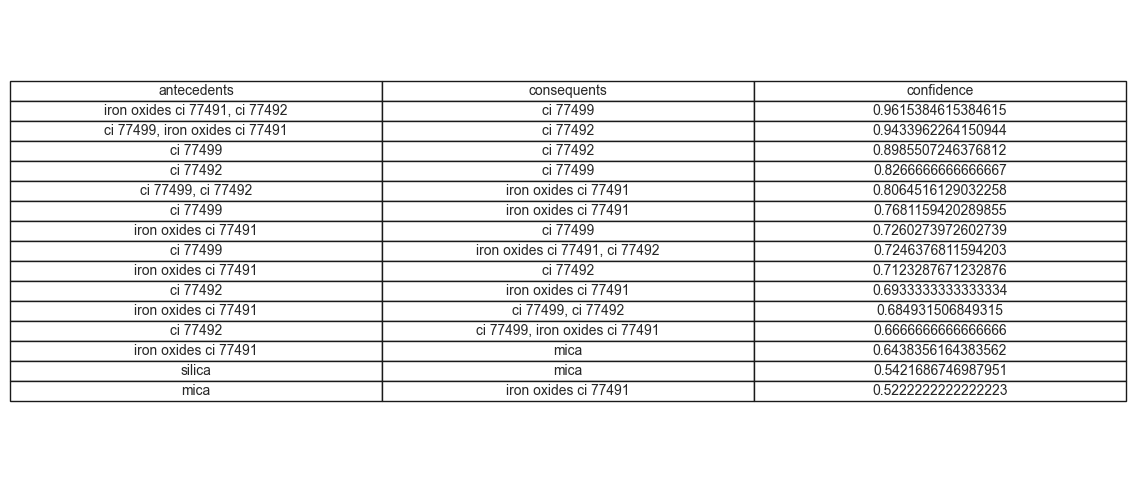

/Users/xochitl/anaconda3/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


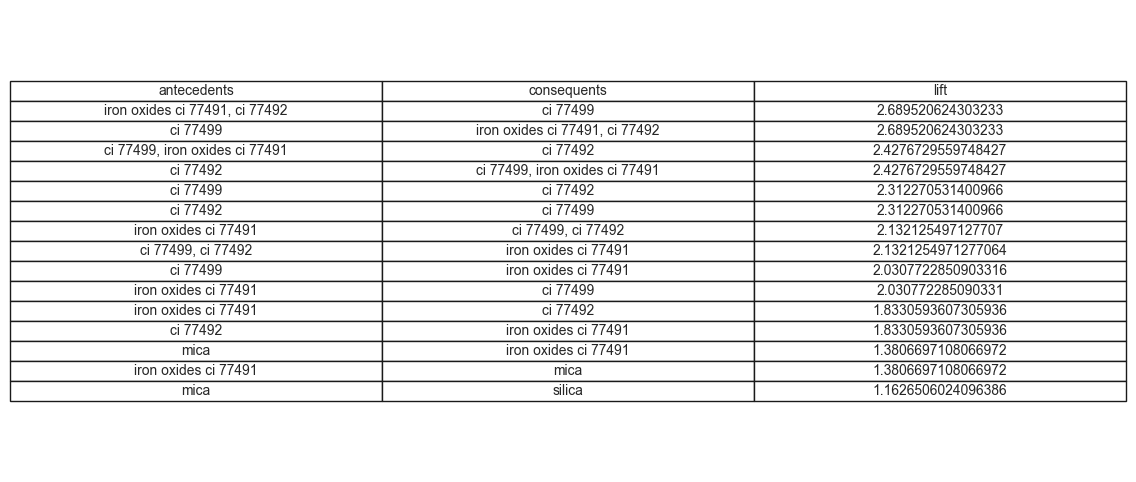

                       antecedents                     consequents      lift
0   iron oxides ci 77491, ci 77492                        ci 77499  2.689521
1                         ci 77499  iron oxides ci 77491, ci 77492  2.689521
2   ci 77499, iron oxides ci 77491                        ci 77492  2.427673
3                         ci 77492  ci 77499, iron oxides ci 77491  2.427673
4                         ci 77499                        ci 77492  2.312271
5                         ci 77492                        ci 77499  2.312271
6             iron oxides ci 77491              ci 77499, ci 77492  2.132125
7               ci 77499, ci 77492            iron oxides ci 77491  2.132125
8                         ci 77499            iron oxides ci 77491  2.030772
9             iron oxides ci 77491                        ci 77499  2.030772
10            iron oxides ci 77491                        ci 77492  1.833059
11                        ci 77492            iron oxides ci 77491  1.833059

In [87]:
basket_df_grouped[basket_df_grouped > 0] = 1
# Apply Apriori algorithm
frequent_itemsets = apriori(basket_df_grouped, min_support=0.23, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

print(rules)

# organize by support
results_table_support = rules[['antecedents', 'consequents', 'support']]
results_table_support = results_table_support.sort_values(by='support', ascending=False).head(15)  # Get top 15 rules
results_table_support.reset_index(drop=True, inplace=True)
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust size as needed
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=results_table_support.values, colLabels=results_table_support.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)  
table.scale(1.2, 1.2) 
plt.savefig('association_rules_support.png', bbox_inches='tight', dpi=300)
plt.show()




# Organize by lift
results_table_confidence = rules[['antecedents', 'consequents', 'confidence']]
results_table_confidence = results_table_confidence.sort_values(by='confidence', ascending=False).head(15)  # Get top 15 rules
results_table_confidence.reset_index(drop=True, inplace=True)
fig, ax = plt.subplots(figsize=(12, 6))  
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=results_table_confidence.values, colLabels=results_table_confidence.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10) 
table.scale(1.2, 1.2) 
plt.savefig('association_rules_confidence.png', bbox_inches='tight', dpi=300)
plt.show()




# Organizing by Lift
results_table_lift = rules[['antecedents', 'consequents', 'lift']]
results_table_lift = results_table_lift.sort_values(by='lift', ascending=False).head(15)  # Get top 15 rules
results_table_lift.reset_index(drop=True, inplace=True)

fig, ax = plt.subplots(figsize=(12, 6)) 
ax.axis('tight')
ax.axis('off')

table = ax.table(cellText=results_table_lift.values, colLabels=results_table_lift.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)  
table.scale(1.2, 1.2)  
plt.savefig('association_rules_lift.png', bbox_inches='tight', dpi=300)
plt.show()
print(results_table_lift)

/Users/xochitl/anaconda3/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


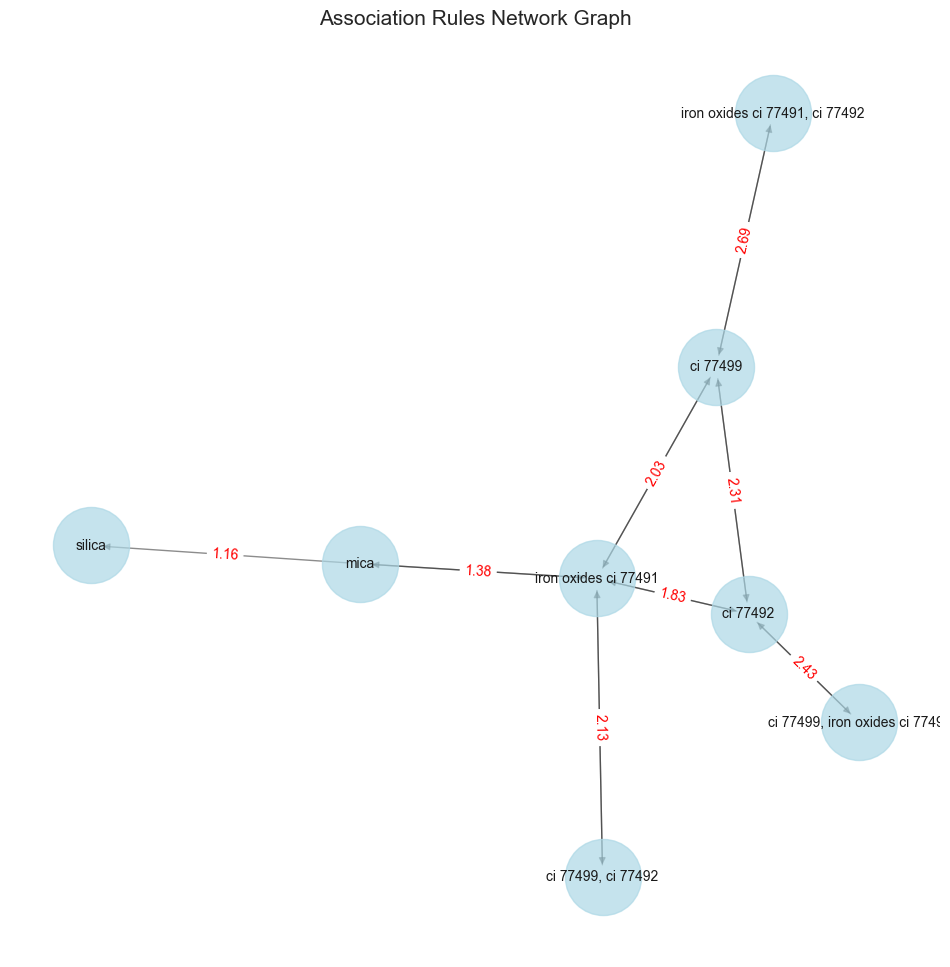

In [90]:
# directed graph
G = nx.DiGraph()

# Nodes and edges
for _, row in results_table_lift.iterrows():
    antecedents = row['antecedents'] 
    consequent = row['consequents'] 
    lift_value = row['lift']          

    # Add the antecedent as a node and create an edge to the consequent
    G.add_node(antecedents, type='antecedent')  
    G.add_node(consequent, type='consequent')   
    G.add_edge(antecedents, consequent, weight=lift_value) 

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G) 
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color='lightblue', alpha=0.7)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.title('Association Rules Network Graph', fontsize=15)
plt.axis('off')  
plt.show()